In [55]:
# Notebook configuration

HOSTNAME= ! hostname
if HOSTNAME[0] == "Georges-MacBook-Pro.local":
    PREFIX="/Users/gwilliams"
else:
    PREFIX=""

ALGODIRECT_HNSW_RESULTS_DIR = PREFIX + "/mnt/nas1/weaviate_benchmark_results/algodirect/jacob/redo"
GSI_HNSW_RESULTS_DIR = PREFIX + "/mnt/nas1/weaviate_benchmark_results/algodirect/sv7-apu11/gwilliams"
GT_DIR = PREFIX + "/mnt/nas1/fvs_benchmark_datasets" # requires nfs mount

In [56]:
# Python imports

import os
import json
import re

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

%matplotlib widget
import ipywidgets as widgets

In [57]:
#
# Algo Direct - HNSW
#

In [60]:
# Accumulate algodirect results by recursively walking the results dir

csvs = []
gsi_csvs = []

# locate a .json files in the results data dir
for root, dir, files in os.walk(ALGODIRECT_HNSW_RESULTS_DIR):
    for file in files:
        
        if file.endswith(".csv"):
            fpath = os.path.join(root, file)
            csvs.append(fpath)

for root, dir, files in os.walk(GSI_HNSW_RESULTS_DIR):
    for file in files:
        if file.endswith(".csv") and "flat" not in file:
            fpath = os.path.join(root, file)
            gsi_csvs.append(fpath)
#print(csvs)

In [125]:
# Load all gsi apu csv results into one dataframe

gsi_dfs = []

for csvfile in gsi_csvs:
    # parse the file name for info
    _df = pd.read_csv(csvfile)
    parts = os.path.basename(csvfile).split("_")
    print(parts)
    if parts[2]=="work": continue
    _df['implementation']=parts[1]
    _df['machine']=parts[2]
    _df['dset']="deep-"+parts[3]  # TODO: make sure to change for different base dataset
    # skip idx 4 because it's cluster or flat
    _df['numrecs']=int(parts[5])
    _df['bits']=int(parts[6])
    _df['importtime']=float(parts[7])
    _df['walltime']=float(parts[8][:-4])
    gsi_dfs.append(_df)

gsi_df = pd.concat(gsi_dfs)
# print(df.columns, df.shape)

['algodirect', 'gemini', 'sv7-apu11', 'deep1b', 'clusters', '1000000', '64', '2.233583', '2.233616.csv']
['algodirect', 'gemini', 'sv7-apu11', 'deep1b', 'clusters', '2000000', '256', '4.645472', '4.645534.csv']
['algodirect', 'gemini', 'sv7-apu11', 'deep1b', 'clusters', '20000000', '64', '35.921844', '35.921897.csv']
['algodirect', 'gemini', 'sv7-apu11', 'deep1b', 'clusters', '50000000', '768', '102.218126', '102.218171.csv']
['algodirect', 'gemini', 'sv7-apu11', 'deep1b', 'clusters', '5000000', '768', '10.078358', '10.078407.csv']
['algodirect', 'gemini', 'sv7-apu11', 'deep1b', 'clusters', '500000000', '512', '26066.118713', '26066.118766.csv']
['algodirect', 'gemini', 'sv7-apu11', 'deep1b', 'clusters', '50000000', '512', '71.500378', '71.500427.csv']
['algodirect', 'gemini', 'sv7-apu11', 'deep1b', 'clusters', '20000000', '512', '29.758237', '29.758260.csv']
['algodirect', 'gemini', 'sv7-apu11', 'deep1b', 'clusters', '5000000', '128', '9.909256', '9.909271.csv']
['algodirect', 'gemini

In [126]:
# Load all hnsw csv results into one dataframe

dfs = []

for csvfile in csvs:
    # parse the file name for info
    _df = pd.read_csv(csvfile)
    parts = os.path.basename(csvfile).split("_")
    print(parts)
    if parts[2]=="work": continue
    _df['implementation']=parts[1]
    _df['machine']=parts[2]
    _df['dset']="deep-"+parts[3]  # TODO: make sure to change for different base dataset
    _df['numrecs']=int(parts[4])
    _df['ef']=int(parts[5])
    _df['importtime']=float(parts[6])
    _df['walltime']=float(parts[7][:-4])
    dfs.append(_df)

df = pd.concat(dfs)
# print(df.columns, df.shape)

['algodirect', 'hnsw', 'fractals-1', '10M', '10000000', '256', '7844.880081', '7846.929756.csv']
['algodirect', 'hnsw', 'fractals-1', '10M', '10000000', '128', '7844.880081', '7846.929756.csv']
['algodirect', 'hnsw', 'fractals-1', '1M', '1000000', '64', '523.456931', '523.742372.csv']
['algodirect', 'hnsw', 'fractals-1', '2M', '2000000', '64', '846.896871', '847.230758.csv']
['algodirect', 'hnsw', 'fractals-1', '100M', '100000000', '128', '141989.792003', '142015.029860.csv']
['algodirect', 'hnsw', 'fractals-1', '2M', '2000000', '128', '846.896871', '847.230758.csv']
['algodirect', 'hnsw', 'fractals-1', '2M', '2000000', '256', '846.896871', '847.230758.csv']
['algodirect', 'hnsw', 'fractals-1', '250M', '250000000', '64', '855149.766747', '855279.656859.csv']
['algodirect', 'hnsw', 'fractals-1', '100M', '100000000', '512', '141989.792003', '142015.029860.csv']
['algodirect', 'hnsw', 'fractals-1', '20M', '20000000', '64', '31192.723055', '31200.853808.csv']
['algodirect', 'hnsw', 'fracta

In [65]:
# Show the data

pd.reset_option('display.max_rows')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
#df

In [132]:
# compute recall via GT file

print(gsi_df.columns, gsi_df.shape)

# get all unique dataset sizes
sizes = gsi_df['numrecs'].unique()
sizes.sort()
print("all sizes=",sizes)

# get all unique bit sizes
bits = gsi_df['bits'].unique()
bits.sort()
print("all efs=",bits)

# create empty ecall10 column to be computed shortly
gsi_df['recall10']= None

def hsize(numrecs):
    '''get text abbrev of raw numrecs'''
    if numrecs==10000: return "10K"
    elif numrecs==1000000: return "1M"
    elif numrecs==2000000: return "2M"
    elif numrecs==5000000: return "5M"
    elif numrecs==10000000: return "10M"
    elif numrecs==20000000: return "20M"
    elif numrecs==50000000: return "50M"
    elif numrecs==100000000: return "100M"
    elif numrecs==250000000: return "250M"
    elif numrecs==500000000: return "500M"
    else: raise Exception("Unsupported size" + str(numrecs))


# accumulate summaries for new dataframe
summaries = []

for bit in bits:
    for sz in sizes:
        # get the ground truth file for this numrecs size
        hsz = hsize(sz)
        gt_file = os.path.join(GT_DIR, "deep-%s-gt-1000.npy" % hsz)
        if not os.path.exists(gt_file):
            raise Exception("Cannot find "+ gt_file)
        gt = np.load(gt_file)
        #print(gt_file, gt.shape)
    
        # get the rows for this numrecs size
        gsi_df_sz = gsi_df[ (gsi_df['numrecs']==sz) & \
                    (gsi_df['bits']==bit) ]
        if gsi_df_sz.shape[0]==0:
            print("Nothing for bits=%d and numrecs=%d" % (ef, sz))
            continue
        elif gsi_df_sz.shape[0]!=1000:
            print("Warning: multiple runs across query set (%d,%d)" % \
                (ef,sz))
            
        # iterate all rows and compute recall
        for i in range(gsi_df_sz.shape[0]):
            # get query index
            q_i = gsi_df_sz.iloc[i, list(gsi_df.columns).index('q_index') ]
            # get the search indices for this query index
            inds = [ int(ith) \
                for ith in \
                    gsi_df_sz.iloc[i, list(gsi_df.columns).index('inds')]
                        .replace("=","-").split("-") ]
            #print(q_i)
            # get the associated ground truth indices for this query for k=10
            gt10 = gt[q_i][0:10]
            # compute intersection for recall
            isec = np.intersect1d( gt10, inds)
            recall10 = len(isec)/10.0
            # apply to this row
            gsi_df_sz.at[i,'recall10'] = recall10
 
        # compute mean recall
        recall10_mean = gsi_df_sz['recall10'].mean()
    
        # compute mean search time 
        search_mean = (gsi_df_sz['search_time'].mean()) * 1000.0
    
        # grab the train time
        import_time = gsi_df_sz['importtime'].mean()
        
        # grab the wall import time
        wall_time = gsi_df_sz['walltime'].mean()
        
        #print(bt, sz, recall10_mean, search_mean, train_time, wall_time )
        summary = {'bits':bit, 'numrecs':sz, \
                   'recall10_mean': recall10_mean, \
                   'search_mean': search_mean, \
                   'import_time': import_time, \
                   'wall_time': wall_time }
        summaries.append(summary)

summary_gsi_df = pd.DataFrame(summaries)
summary_gsi_df = summary_gsi_df[summary_gsi_df['bits'] != 768]
print(summary_gsi_df)

print("Done")

Index(['ts', 'q_index', 'search_time', 'inds', 'implementation', 'machine',
       'dset', 'numrecs', 'bits', 'importtime', 'walltime', 'recall10'],
      dtype='object') (40000, 12)
all sizes= [  1000000   2000000   5000000  10000000  20000000  50000000 100000000
 250000000 500000000]
all efs= [ 64 128 256 512 768]
Nothing for bits=512 and numrecs=250000000
Nothing for bits=512 and numrecs=500000000
Nothing for bits=512 and numrecs=250000000
Nothing for bits=512 and numrecs=250000000
Nothing for bits=512 and numrecs=500000000
    bits    numrecs  recall10_mean  search_mean   import_time     wall_time
0     64    1000000         0.9624    22.011360      2.233583      2.233616
1     64    2000000         0.9474    22.492887      4.389998      4.390045
2     64    5000000         0.9233    23.612933     10.721548     10.721599
3     64   10000000         0.8865    24.905373     18.433649     18.433715
4     64   20000000         0.8889    26.472284     35.921844     35.921897
5     64   

In [136]:
# interpolate 250M, 512 bit search and recall

agg = summary_gsi_df[(summary_gsi_df.numrecs == 100000000) | (summary_gsi_df.numrecs == 500000000)].groupby('bits').mean()
interp_recall, interp_search = agg.loc[[512]][['recall10_mean', 'search_mean']].values.tolist()[0]
tmp = [512, 250000000, interp_recall, interp_search, None, None]
summary_gsi_df.index = [x + 1 if x == 32 else x for x in summary_gsi_df.index]
summary_gsi_df.loc[32] = tmp
summary_gsi_df.numrecs, summary_gsi_df.bits = summary_gsi_df.numrecs.astype(int), summary_gsi_df.bits.astype(int)
summary_gsi_df.sort_index(inplace=True)

In [137]:
# compute recall via GT file (hnsw)

print(df.columns, df.shape)

# get all unique dataset sizes
sizes = df['numrecs'].unique()
sizes.sort()
print("all sizes=",sizes)

# get all unique bit sizes
efs = df['ef'].unique()
efs.sort()
print("all efs=",efs)

# create empty ecall10 column to be computed shortly
df['recall10']= None

def hsize(numrecs):
    '''get text abbrev of raw numrecs'''
    if numrecs==10000: return "10K"
    elif numrecs==1000000: return "1M"
    elif numrecs==2000000: return "2M"
    elif numrecs==5000000: return "5M"
    elif numrecs==10000000: return "10M"
    elif numrecs==20000000: return "20M"
    elif numrecs==50000000: return "50M"
    elif numrecs==100000000: return "100M"
    elif numrecs==250000000: return "250M"
    elif numrecs==500000000: return "500M"
    else: raise Exception("Unsupported size" + str(numrecs))


# accumulate summaries for new dataframe
summaries = []

for ef in efs:
    for sz in sizes:
        # get the ground truth file for this numrecs size
        hsz = hsize(sz)
        gt_file = os.path.join(GT_DIR, "deep-%s-gt-1000.npy" % hsz)
        if not os.path.exists(gt_file):
            raise Exception("Cannot find "+ gt_file)
        gt = np.load(gt_file)
        #print(gt_file, gt.shape)
    
        # get the rows for this numrecs size
        df_sz = df[ (df['numrecs']==sz) & \
                    (df['ef']==ef) ]
        if df_sz.shape[0]==0:
            print("Nothing for bits=%d and numrecs=%d" % (ef, sz))
            continue
        elif df_sz.shape[0]!=1000:
            print("Warning: multiple runs across query set (%d,%d)" % \
                (ef,sz))
            
        # iterate all rows and compute recall
        for i in range(df_sz.shape[0]):
            # get query index
            q_i = df_sz.iloc[i, list(df.columns).index('q_index') ]
            # get the search indices for this query index
            inds = [ int(ith) \
                for ith in \
                    df_sz.iloc[i, list(df.columns).index('inds')]
                        .replace("=","-").split("-") ]
            #print(q_i)
            # get the associated ground truth indices for this query for k=10
            gt10 = gt[q_i][0:10]
            # compute intersection for recall
            isec = np.intersect1d( gt10, inds)
            recall10 = len(isec)/10.0
            # apply to this row
            df_sz.at[i,'recall10'] = recall10
    
        # compute mean recall
        recall10_mean = df_sz['recall10'].mean()
    
        # compute mean search time 
        search_mean = (df_sz['search_time'].mean()) * 1000.0
    
        # grab the train time
        import_time = df_sz['importtime'].mean()
        
        # grab the wall import time
        wall_time = df_sz['walltime'].mean()
        
        #print(bt, sz, recall10_mean, search_mean, train_time, wall_time )
        summary = {'ef':ef, 'numrecs':sz, \
                   'recall10_mean': recall10_mean, \
                   'search_mean': search_mean, \
                   'import_time': import_time, \
                   'wall_time': wall_time }
        summaries.append(summary)

summary_df = pd.DataFrame(summaries)
print(summary_df)

print("Done")

Index(['ts', 'q_index', 'search_time', 'inds', 'implementation', 'machine',
       'dset', 'numrecs', 'ef', 'importtime', 'walltime'],
      dtype='object') (40000, 11)
all sizes= [    10000   1000000   2000000   5000000  10000000  20000000  50000000
 100000000 250000000 500000000]
all efs= [ 64 128 256 512]
     ef    numrecs  recall10_mean  search_mean   import_time     wall_time
0    64      10000         0.9959     0.129360  1.374504e+00  1.376540e+00
1    64    1000000         0.9537     0.587304  5.234569e+02  5.237424e+02
2    64    2000000         0.9420     0.691642  8.468969e+02  8.472308e+02
3    64    5000000         0.9328     1.347785  3.604795e+03  3.605949e+03
4    64   10000000         0.9208     1.569568  7.844880e+03  7.846930e+03
5    64   20000000         0.9025     2.023533  3.119272e+04  3.120085e+04
6    64   50000000         0.8802     2.511672  7.145397e+04  7.146827e+04
7    64  100000000         0.8710     2.715001  1.419898e+05  1.420150e+05
8    64  250000

hnsw train time [10000, 1000000, 2000000, 5000000, 10000000, 20000000, 50000000, 100000000, 250000000, 500000000] [0.0003818066666666668, 0.14540470305555553, 0.2352491308333334, 1.001331927222222, 2.179133355833333, 8.664645293055557, 19.848325099722224, 39.44160888972221, 237.5416018741666, 432.4261059541668]
hnw wall import time [10000, 1000000, 2000000, 5000000, 10000000, 20000000, 50000000, 100000000, 250000000, 500000000] [0.00038237222222222214, 0.1454839922222222, 0.23534187722222216, 1.0016525494444446, 2.17970271, 8.666903835555553, 19.852297736944447, 39.448619405555576, 237.57768246083327, 432.4658226855555]
fvs wall import time [1000000, 2000000, 5000000, 10000000, 20000000, 50000000, 100000000, 250000000, 500000000] [0.0006943638194444445, 0.0012784595833333333, 0.0028902134027777777, 0.005134871597222223, 0.008656174444444446, 0.21940947631944452, 1.366615162847222, 3.6575001150000004, 4.710088842222222]
fvs wall import time [1000000, 2000000, 5000000, 10000000, 20000000

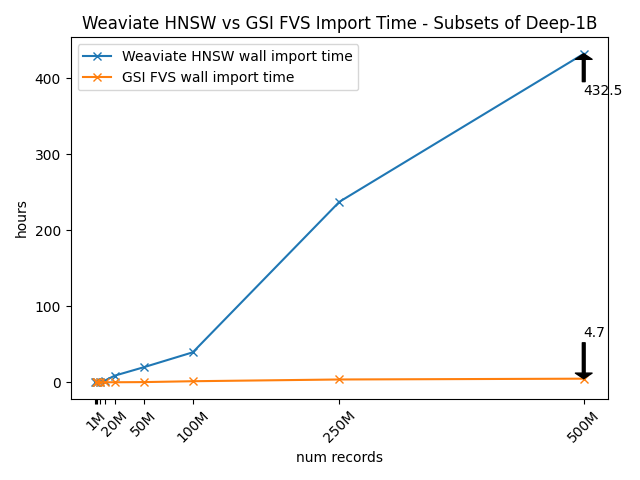

In [138]:
# Plot import/train times

# compute average train time via groupby
avg_import_time = \
    summary_df.groupby( [ 'numrecs' ] ) ['import_time'].mean()

# compute average wall import time via groupby
avg_wall_import_time = \
    summary_df.groupby( [ 'numrecs' ] ) ['wall_time'].mean()

# get the plot points for import time
xs = []
ys = []
for idx in avg_import_time.index:
    x = idx
    xs.append(x)
    y = avg_import_time[idx]/(60.0*60.0)
    ys.append(y)
print("hnsw train time", xs,ys)

# get the plot points for wall import time
wxs = []
wys = []
for idx in avg_wall_import_time.index:
    x = idx
    wxs.append(x)
    y = avg_wall_import_time[idx]/(60.0*60.0)
    wys.append(y)
print("hnw wall import time", wxs,wys)

avg_import_time = \
    summary_gsi_df.groupby(['numrecs'])['import_time'].mean()
avg_wall_import_time = \
    summary_gsi_df.groupby(['numrecs'])['wall_time'].mean()
xgs = []
ygs = []
for idx in avg_import_time.index:
    x = idx
    xgs.append(x)
    y = avg_import_time[idx]/(60.0*60.0)
    ygs.append(y)
print("fvs wall import time", xgs,ygs)

wxgs = []
wygs = []
for idx in avg_wall_import_time.index:
    x = idx
    wxgs.append(x)
    y = avg_wall_import_time[idx]/(60.0*60.0)
    wygs.append(y)
print("fvs wall import time", wxgs,wygs)

# plot the lines and label the plot
fig, ax = plt.subplots()

#
# only show the wall time lines
#
#ax.plot(xs,ys, marker='x', label="import time")
ax.plot(wxs,wys, marker='x', label="Weaviate HNSW wall import time")
#ax.plot(xgs,ygs, marker='x', label="gsi import time")
ax.plot(wxgs,wygs, marker='x', label="GSI FVS wall import time")
ax.set_ylabel('hours')
ax.set_xlabel('num records')
ax.set_xticks(xs)

# don't show all xticks near the start since they bunch up
#ax.set_xticklabels(['10K','1M', '2M', '5M', '10M', '20M', '50M', '100M', '250M', '500M'], rotation = 45)
ax.set_xticklabels(['', '1M','','','', '20M', '50M', '100M', '250M', '500M'], rotation = 45)

#
# annotate last data point in lines of interest
hnsw_hours = "%.1f" % wys[-1]
ax.annotate(hnsw_hours, xy=(wxs[-1],wys[-1]), xytext=(0.0,-30),
            textcoords="offset points",
            arrowprops=dict(facecolor='black',width=2,headlength=4),
            )
gsi_hours = "%.1f" % wygs[-1]
ax.annotate(gsi_hours, xy=(wxgs[-1],wygs[-1]), xytext=(0.0,30),
            textcoords="offset points",
            arrowprops=dict(facecolor='black',width=2,headlength=4),
            )

ax.set_title("Weaviate HNSW vs GSI FVS Import Time - Subsets of Deep-1B")
ax.legend(loc='best')
fig.tight_layout()
fig.savefig("results/weaviate_hnsw_vs_fvs_wall_import_time_ad.png")

# TODO:  plot the variance at each X

In [139]:
summary_gsi_df

,bits,numrecs,recall10_mean,search_mean,import_time,wall_time
0,64,1000000,0.9624,22.011360,2.233583,2.233616
1,64,2000000,0.9474,22.492887,4.389998,4.390045
2,64,5000000,0.9233,23.612933,10.721548,10.721599
3,64,10000000,0.8865,24.905373,18.433649,18.433715
4,64,20000000,0.8889,26.472284,35.921844,35.921897
5,64,50000000,0.8343,29.009352,2889.250224,2889.250275
6,64,100000000,0.7842,33.661810,6391.818142,6391.818214
7,128,1000000,0.9926,25.994667,2.375549,2.375591
8,128,2000000,0.9905,26.687729,4.636360,4.636422
9,128,5000000,0.9819,28.363956,9.909256,9.909271


In [27]:
def format_size(size):
    if size < 1000000:      
        return str(size)[:-3]+'K'
    elif size < 1000000000:
        return str(size)[:-6]+'M'
    else:
        return str(size)[:-9]+'B'

def unformat_size(size):
    if size[-1] == 'K':
        return int(size[:-1]) * 1000
    elif size[-1] == 'M':
        return int(size[:-1]) * 1000000
    else:
        return int(size[:-1]) * 1000000000

interactive(children=(Checkbox(value=False, description='Weaviate_pareto'), Output()), _dom_classes=('widget-i…

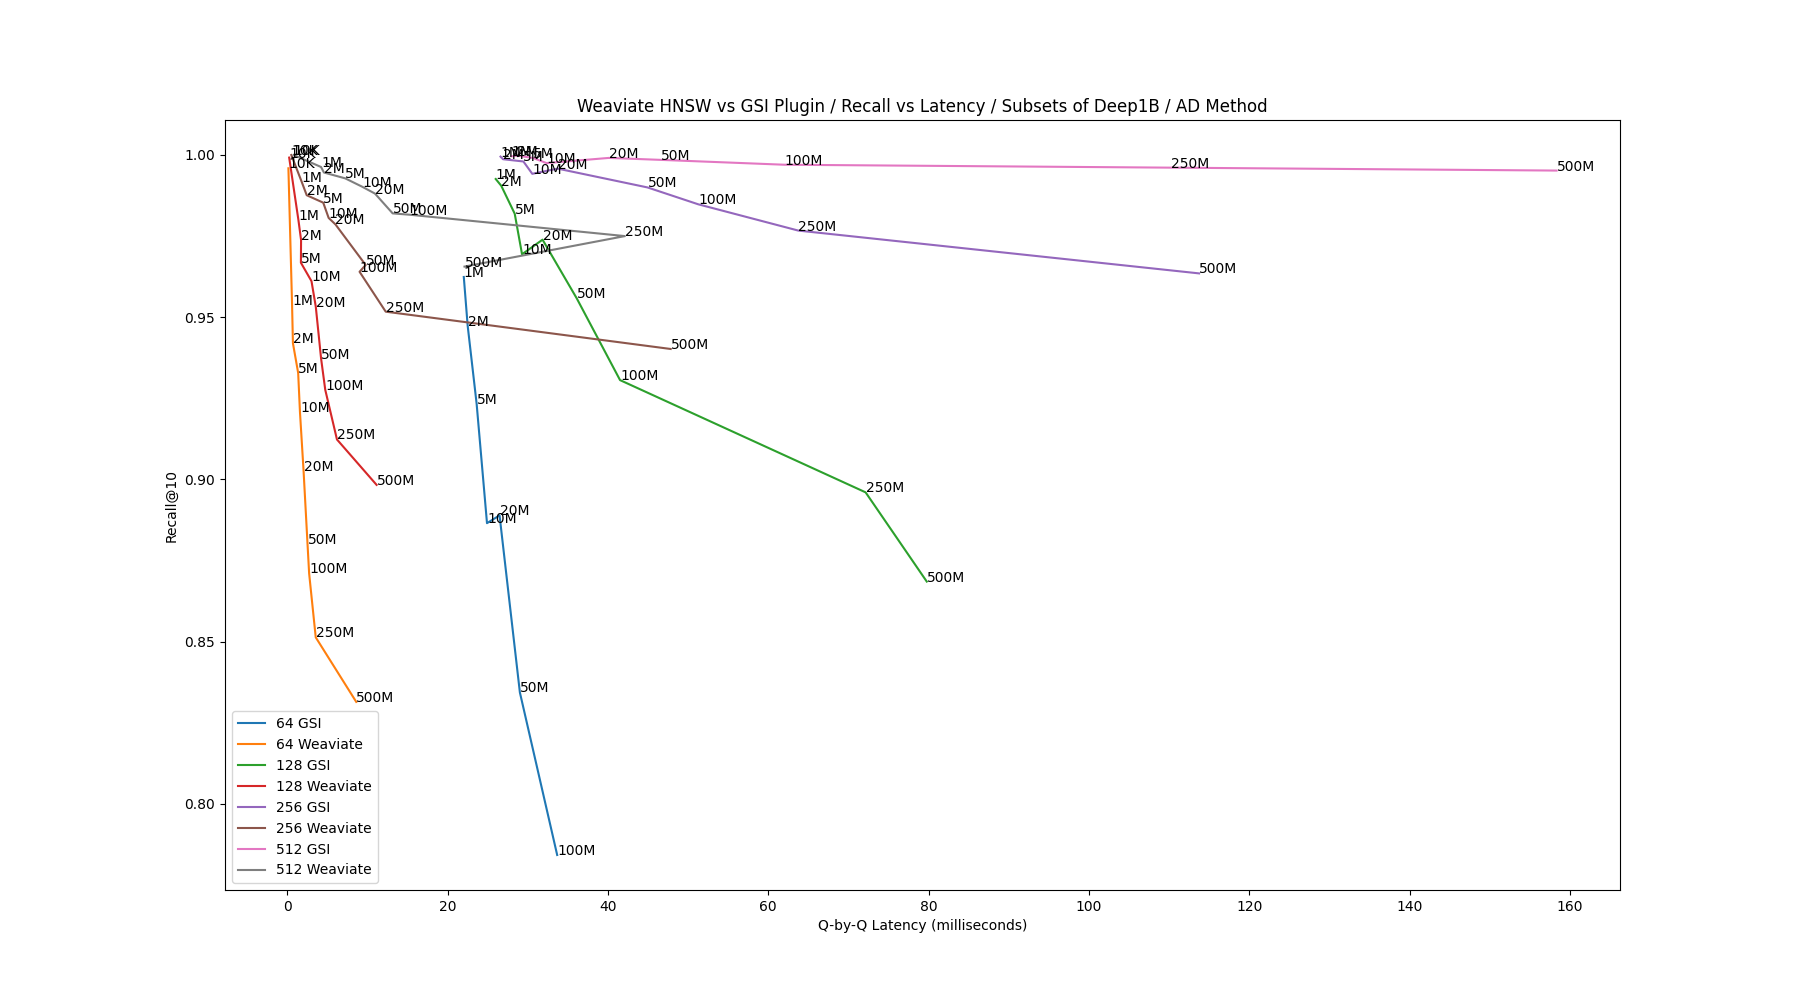

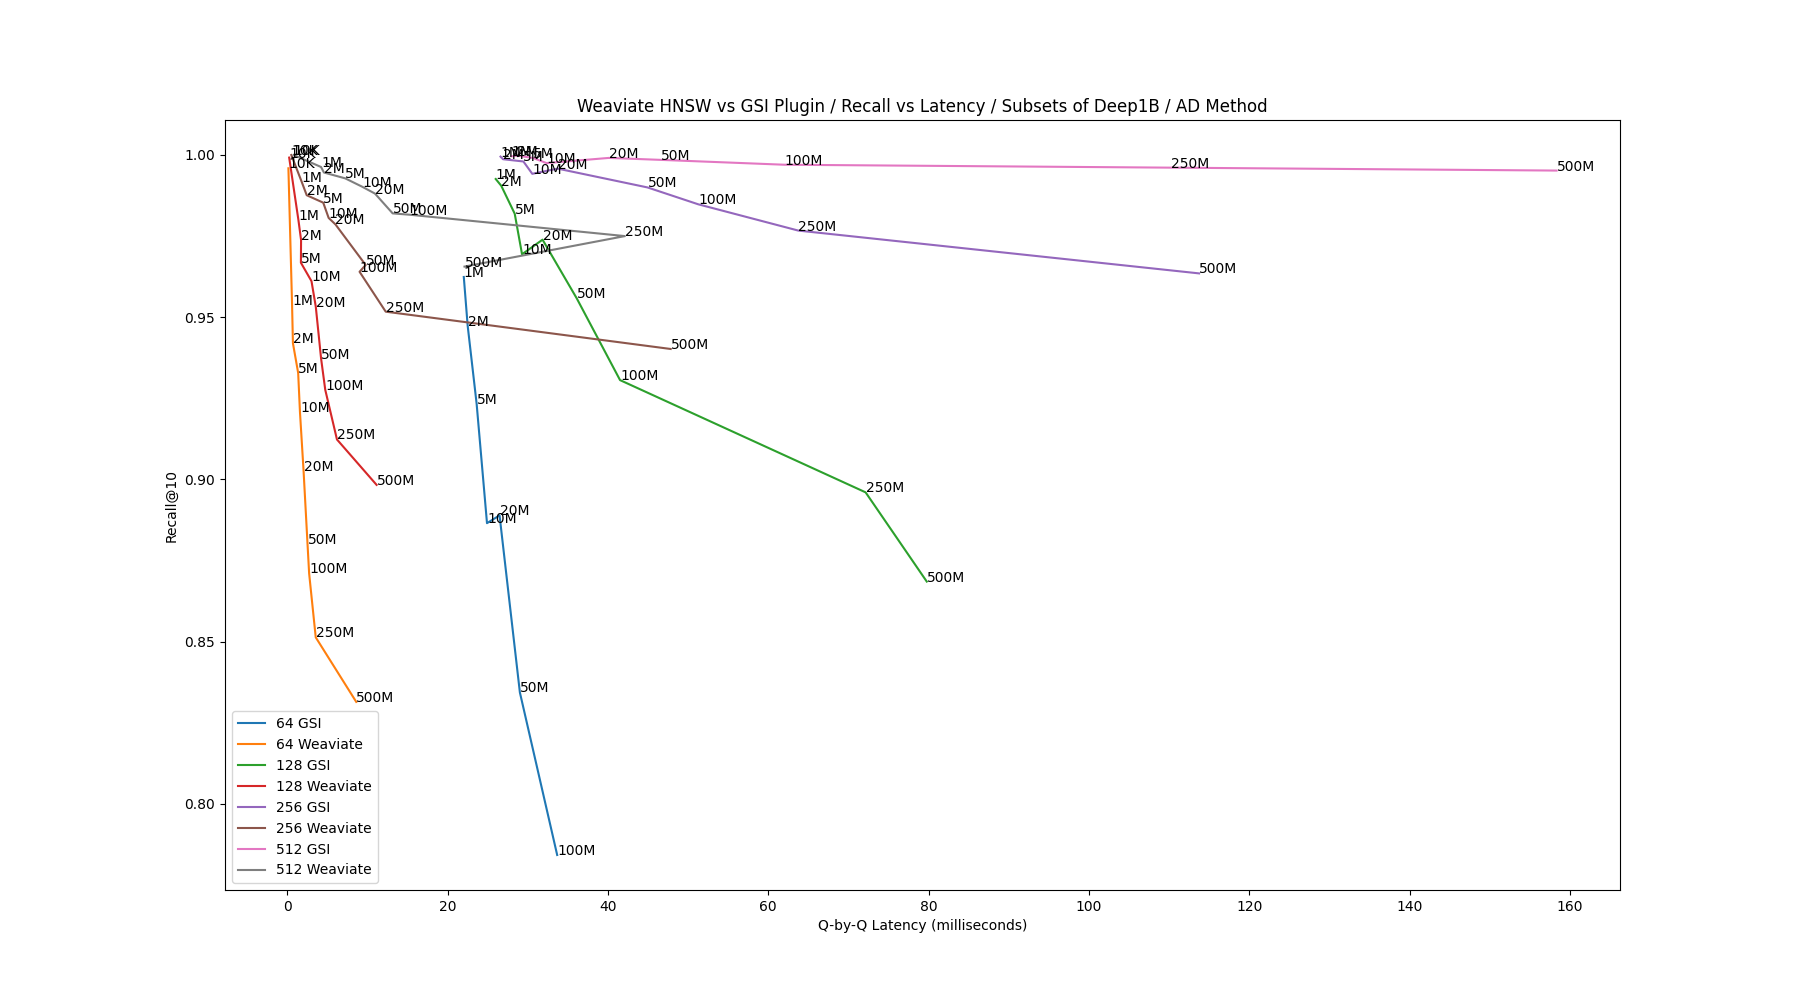

In [28]:
ann_list, lines = [], []
gsi_pareto_list, pareto_list = [], []
def set_graph(a):
    global ann_list
    global lines
    for ef in summary_gsi_df.ef.unique():
        tmp = summary_gsi_df[summary_gsi_df.ef == ef]
        lines.append(plt.plot(tmp.search_mean, tmp.recall10_mean, label = str(ef) + ' GSI', alpha=a))
        for i, j, s in zip(tmp.search_mean, tmp.recall10_mean, tmp.numrecs):
            ann_list.append(plt.annotate(format_size(s), (i,j), alpha=a))
        tmp = summary_df[summary_df.ef == ef]
        lines.append(plt.plot(tmp.search_mean, tmp.recall10_mean, label = str(ef) + " Weaviate", alpha=a))
        for i, j, s in zip(tmp.search_mean, tmp.recall10_mean, tmp.numrecs):
            ann_list.append(plt.annotate(format_size(s), (i,j), alpha=a))

fig, ax = plt.subplots(figsize=(18,10))
@widgets.interact(a=(0,1,0.1))
def update(a=1.0):
    global ann_list
    global lines
    for ann in ann_list:
        ann.remove()
    ann_list[:] = []
    [line.pop(0).remove() for line in lines if len(line) > 0]
    lines[:] = []
    set_graph(a)

gsi_pareto_list = []
@widgets.interact(GSI_pareto=False)
def show_gsi_pareto(GSI_pareto):
    global gsi_pareto_list
    if GSI_pareto:
        for size in summary_gsi_df.numrecs.unique():
            if size < 10000000:
                continue
            tmp = summary_gsi_df[summary_gsi_df.numrecs == size]
            gsi_pareto_list.append(plt.plot(tmp.search_mean, tmp.recall10_mean, color='black', linestyle='dashed'))
    else:
        [line.pop(0).remove() for line in gsi_pareto_list]
        gsi_pareto_list = []

pareto_list = []
@widgets.interact(Weaviate_pareto=False)
def show_weav_pareto(Weaviate_pareto):
    global pareto_list
    if Weaviate_pareto:
        for size in summary_df.numrecs.unique():
            if size < 10000000:
                continue
            tmp = summary_df[summary_df.numrecs == size]
            pareto_list.append(plt.plot(tmp.search_mean, tmp.recall10_mean, color='black', linestyle='dashed'))
    else:
        [line.pop(0).remove() for line in pareto_list if len(line) > 0]
        pareto_list = []


ax.set_xlabel("Q-by-Q Latency (milliseconds)")
ax.set_ylabel("Recall@10")
ax.set_title("Weaviate HNSW vs GSI Plugin / Recall vs Latency / Subsets of Deep1B / AD Method")
ax.legend()
fig.show()

In [29]:
# select 1 dataset size
# colored pareto front

In [30]:
from ipywidgets import Layout, HBox
from IPython.display import clear_output

In [31]:
colors = ['red', 'blue', 'green', 'purple', 'yellow', 'pink', 'teal', 'orange', 'brown', 'gray']
def set_graph(change):
    update(change)
    global ann_list
    global lines
    global weav
    global gsi
    global p_mode

    if change['new'] == ('GSI', ):
        gsi, weav = True, False
        return
    elif change['new'] == ('Weaviate', ):
        gsi, weav = False, True
        return
    elif change['new'] == ('GSI', 'Weaviate'):
        gsi, weav = True, True
        return
    
    if type(change['new']) == bool:
        p_mode = not p_mode
        return
    
    lines = []
    ann_list = []
    if p_mode:
        for color, size in enumerate(change['new']):
            if gsi:
                tmp = summary_gsi_df[summary_gsi_df.numrecs == unformat_size(size)]
                lines.append(plt.plot(tmp.search_mean, tmp.recall10_mean, '-o', label=str(size) + ' GSI', color=colors[color]))
                for i, j, s in zip(tmp.search_mean, tmp.recall10_mean, tmp.ef):
                    ann_list.append(plt.annotate(s, (i,j)))
            if weav:
                tmp = summary_df[summary_df.numrecs == unformat_size(size)]
                lines.append(plt.plot(tmp.search_mean, tmp.recall10_mean, '-o', label=str(size) + ' Weaviate', color=colors[::-1][color]))
                for i, j, s in zip(tmp.search_mean, tmp.recall10_mean, tmp.ef):
                    ann_list.append(plt.annotate(s, (i,j)))
    else:
        for color, ef in enumerate(summary_gsi_df.ef.unique()):
            if gsi:
                tmp = summary_gsi_df[(summary_gsi_df.ef == ef) & (summary_gsi_df.numrecs.isin([unformat_size(x) for x in change['new']]))]
                lines.append(plt.plot(tmp.search_mean, tmp.recall10_mean, '-o', label = str(ef) + ' GSI', color=colors[color]))
                for i, j, s in zip(tmp.search_mean, tmp.recall10_mean, tmp.numrecs):
                    ann_list.append(plt.annotate(format_size(s), (i,j)))
            if weav:
                tmp = summary_df[(summary_df.ef == ef) & (summary_df.numrecs.isin([unformat_size(x) for x in change['new']]))]
                lines.append(plt.plot(tmp.search_mean, tmp.recall10_mean, '-o', label = str(ef) + " Weaviate", color=colors[::-1][color]))
                for i, j, s in zip(tmp.search_mean, tmp.recall10_mean, tmp.numrecs):
                    ann_list.append(plt.annotate(format_size(s), (i,j)))
    ax.legend()

def update(change):
    global ann_list
    global lines
    for ann in ann_list:
        ann.remove()
    ann_list[:] = []
    [line.pop(0).remove() for line in lines if len(line) > 0]
    lines[:] = []
    plt.close(0)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


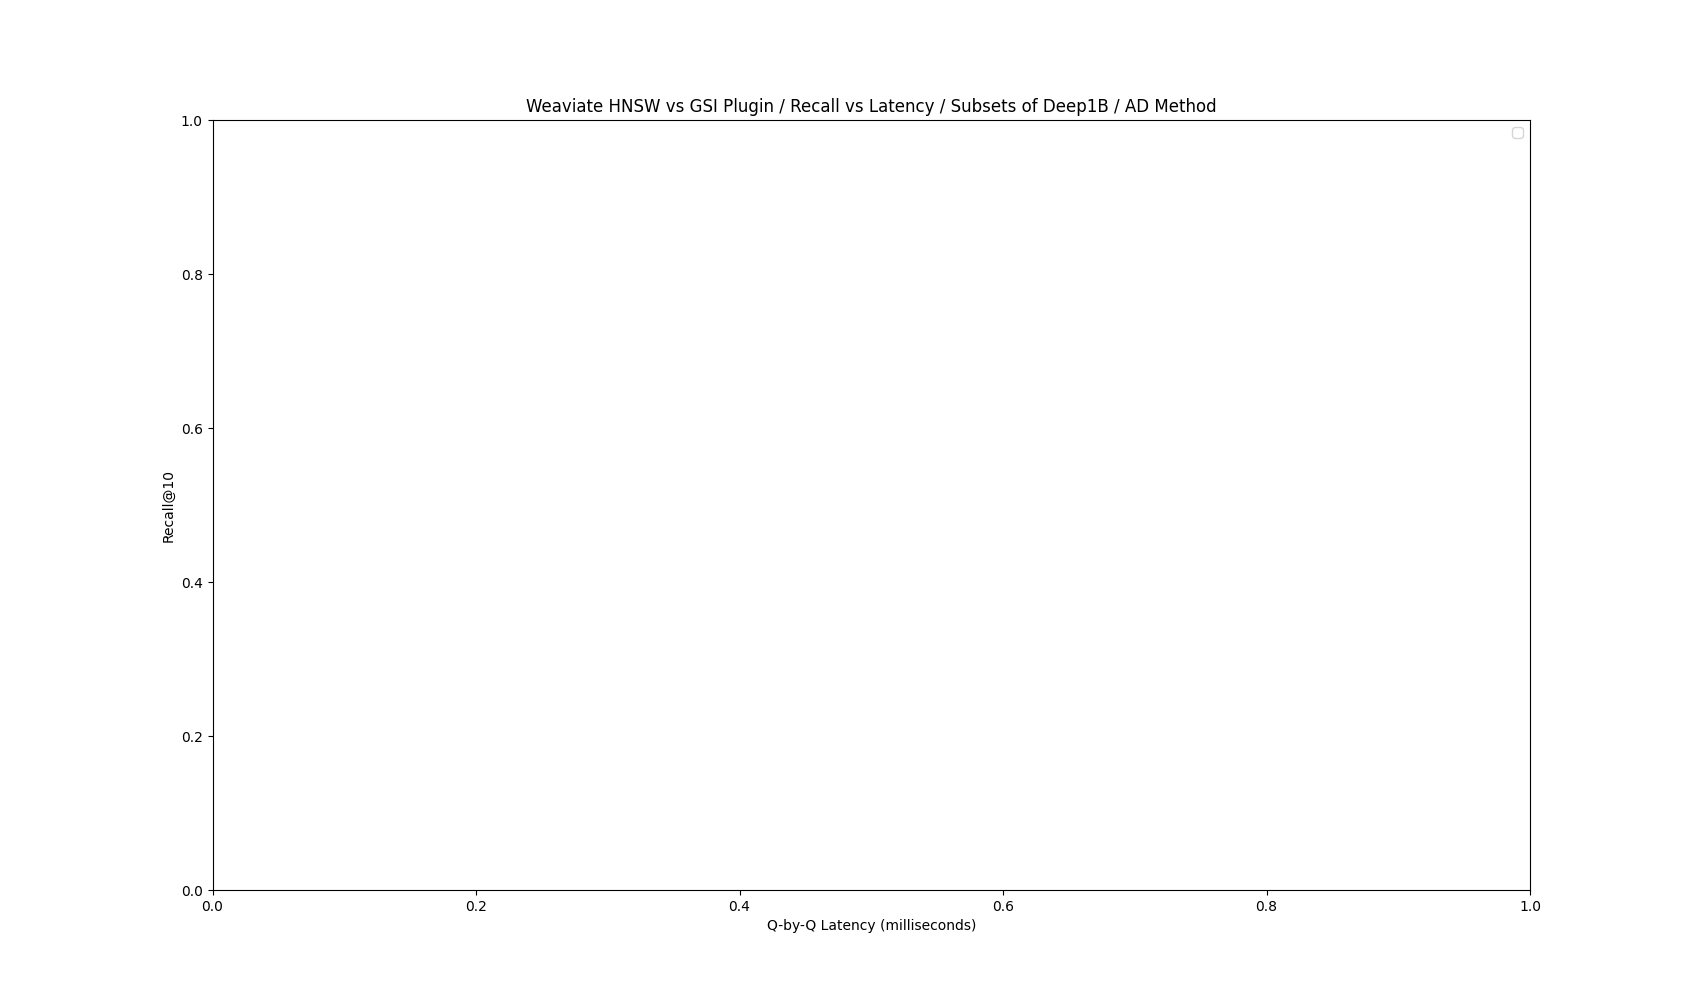

In [32]:
sm = widgets.SelectMultiple(
    options = ['GSI', 'Weaviate'],
    layout=Layout(height='50px', width='100px')
)
sm_size = widgets.SelectMultiple(
    options=[format_size(size) for size in sizes],
    layout=Layout(width='40px', height='180px')
)
pareto = widgets.Checkbox(
    value=False,
    description='pareto mode'
)

def on_value_change(change):
    print(change['new'])
    print('change: ', change)

sm.observe(set_graph, names='value')
sm_size.observe(set_graph, names='value')
pareto.observe(set_graph, names='value')
weav, gsi, p_mode = False, False, False
fig, ax = plt.subplots(figsize=(17,10))
ax.set_xlabel("Q-by-Q Latency (milliseconds)")
ax.set_ylabel("Recall@10")
ax.set_title("Weaviate HNSW vs GSI Plugin / Recall vs Latency / Subsets of Deep1B / AD Method")
ax.legend()
HBox([sm, sm_size, pareto])


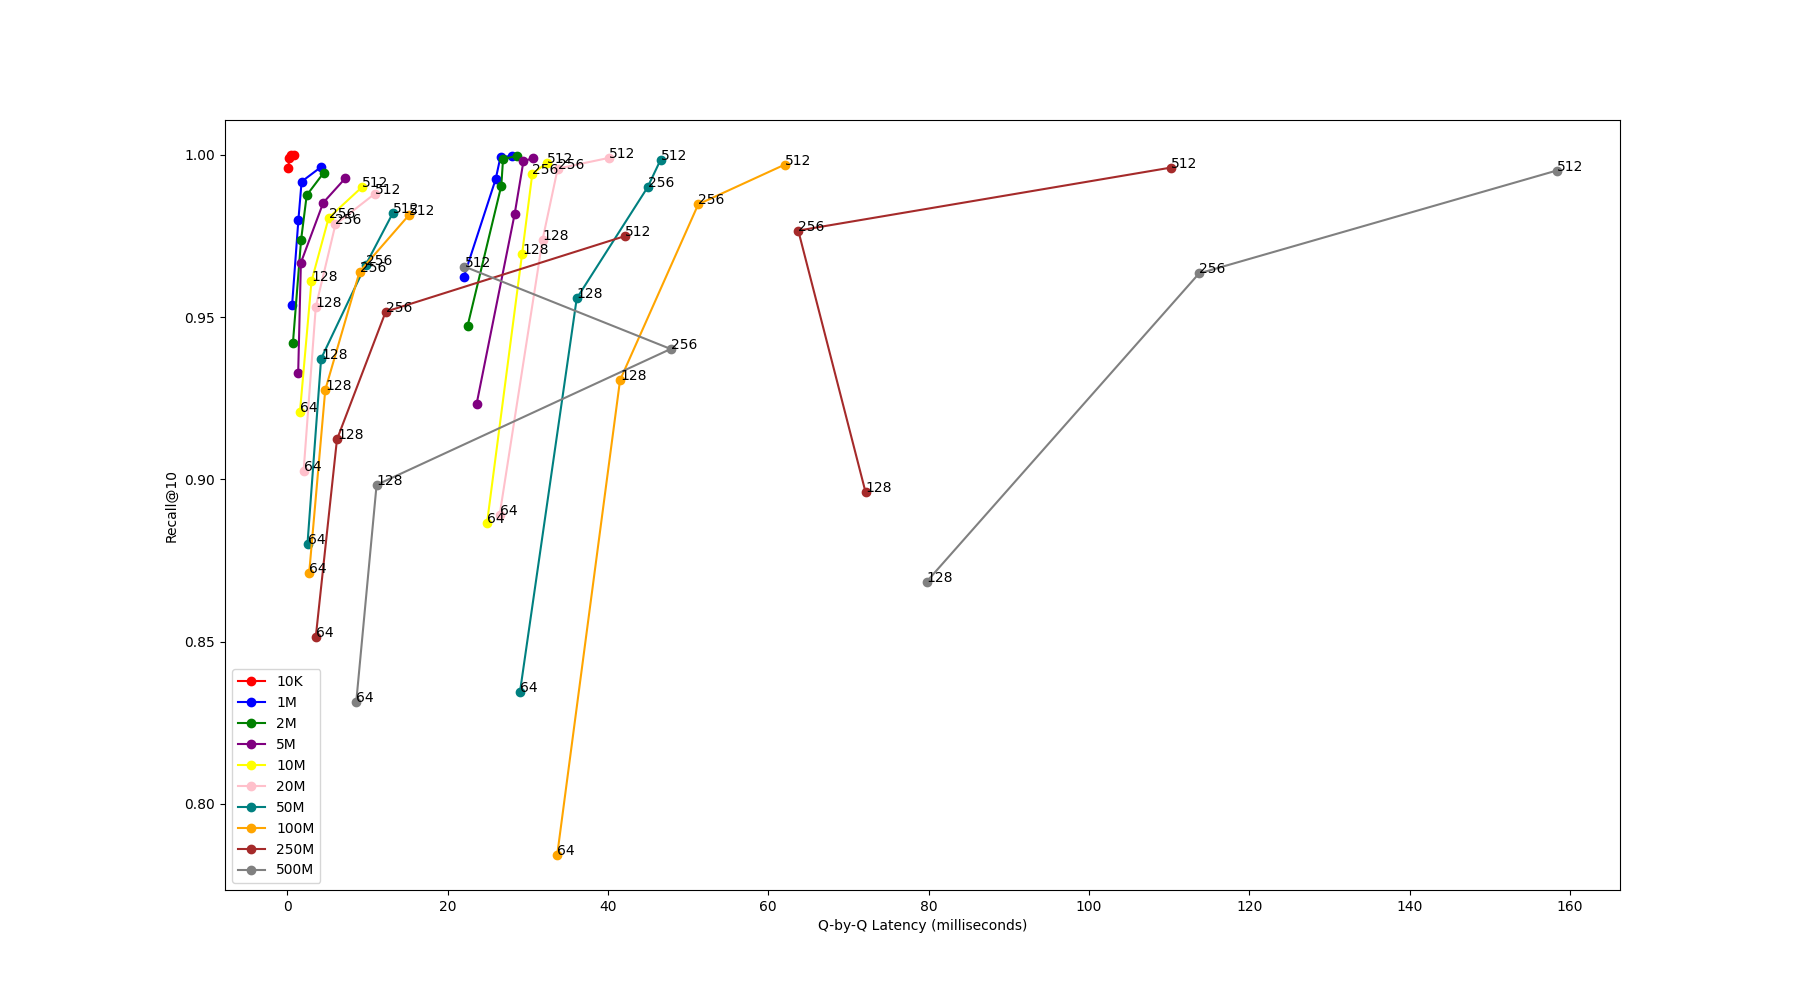

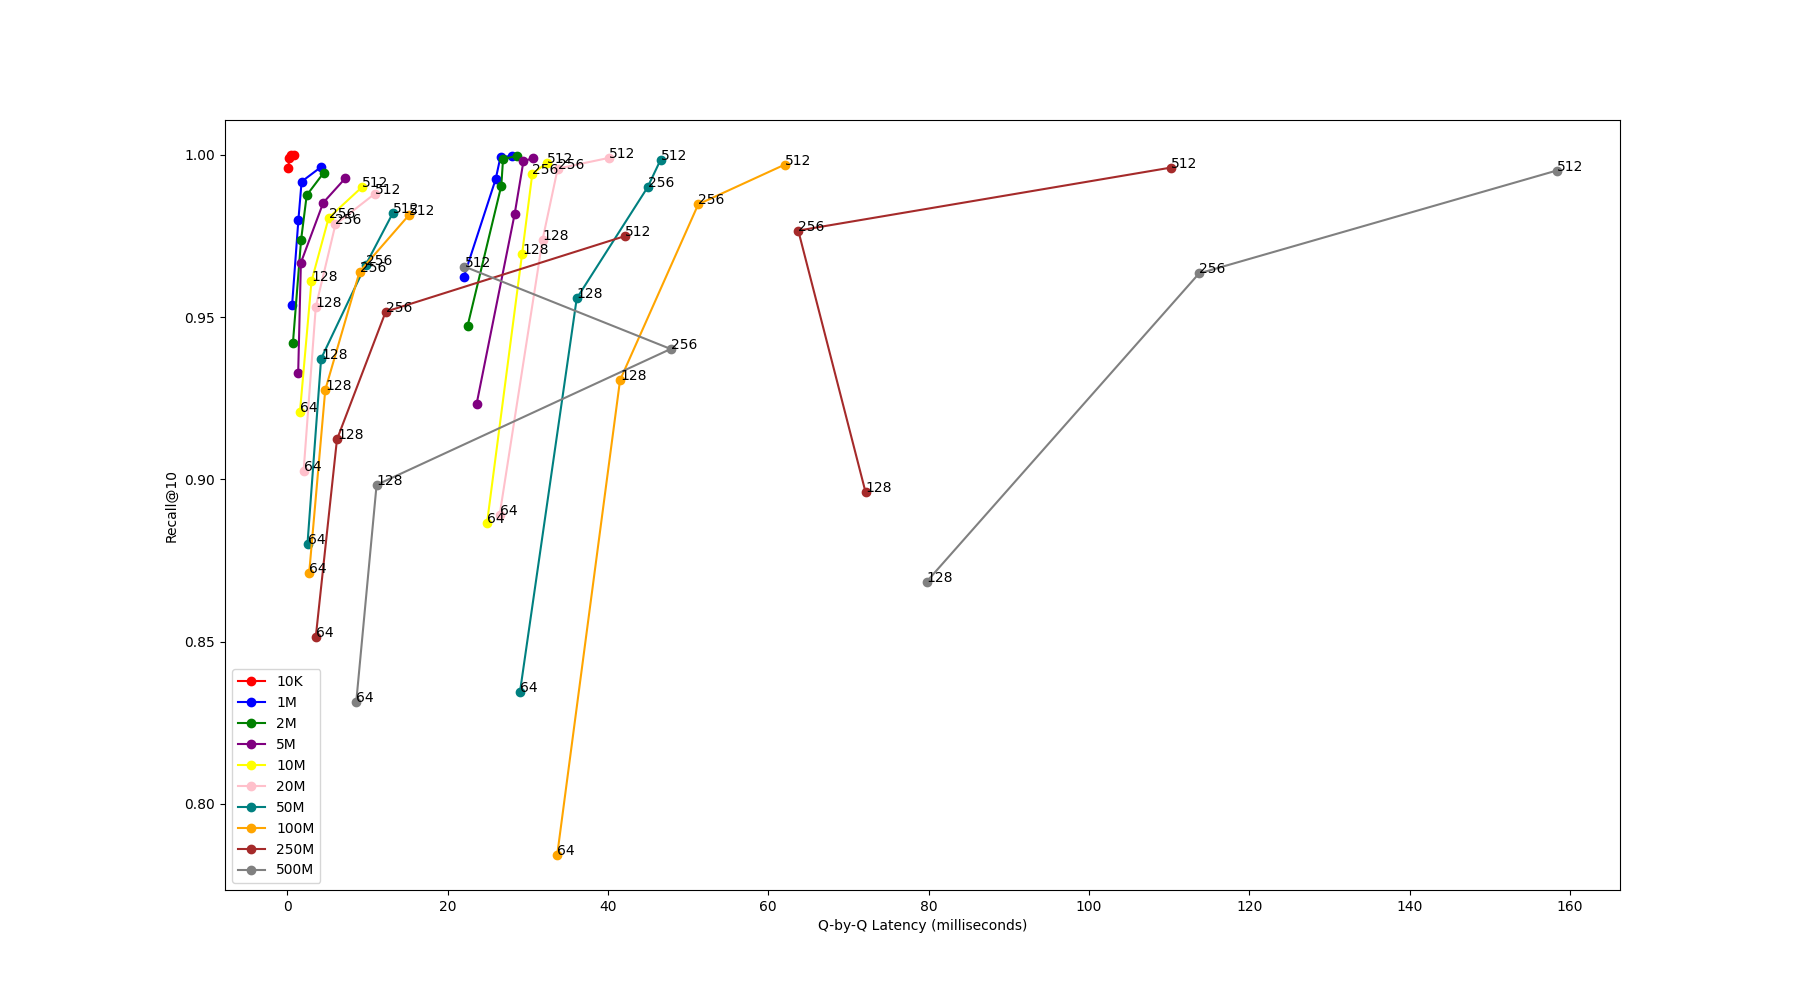

In [33]:
colors = ['red', 'blue', 'green', 'purple', 'yellow', 'pink', 'teal', 'orange', 'brown', 'gray']
fig, ax = plt.subplots(figsize=(18,10))
for idx, size in enumerate(summary_df.numrecs.unique()):
    tmp = summary_df[summary_df.numrecs == size]
    plt.plot(tmp.search_mean, tmp.recall10_mean, '-o', label=format_size(size), color=colors[idx])
    if size >= 10000000:
        for i, j, ef in zip(tmp.search_mean, tmp.recall10_mean, tmp.ef):
            plt.annotate(ef, (i,j))
    tmp = summary_gsi_df[summary_gsi_df.numrecs == size]
    plt.plot(tmp.search_mean, tmp.recall10_mean, '-o', color=colors[idx])
    if size >= 10000000:
        for i, j, ef in zip(tmp.search_mean, tmp.recall10_mean, tmp.ef):
            plt.annotate(ef, (i, j))


ax.set_xlabel("Q-by-Q Latency (milliseconds)")
ax.set_ylabel("Recall@10")
ax.legend()
fig.show()

In [ ]:
#
# Individual Paretto front graphs
#


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


     ef    numrecs  recall10_mean  search_mean   import_time     wall_time
9    64  500000000         0.8314     8.593629  1.556734e+06  1.556877e+06
19  128  500000000         0.8983    11.130874  1.556734e+06  1.556877e+06
29  256  500000000         0.9402    47.821046  1.556734e+06  1.556877e+06
39  512  500000000         0.9656    22.098475  1.556734e+06  1.556877e+06
    bits    numrecs  recall10_mean  search_mean   import_time     wall_time
15   128  500000000         0.8685    79.771007  24141.563112  24141.563170
24   256  500000000         0.9635   113.749056    661.277671    661.277726
33   512  500000000         0.9952   158.350539  26066.118713  26066.118766
[8.593629, 11.130873999999999, 47.821045999999996, 22.098475] [0.8313999999999975, 0.8982999999999967, 0.9401999999999977, 0.9655999999999983]
[79.77100700000001, 113.749056, 158.35053900000003] [0.8684999999999959, 0.9634999999999969, 0.9951999999999992]


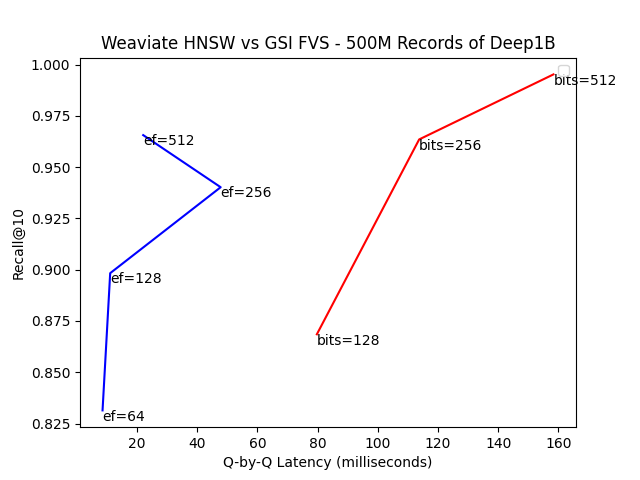

In [157]:
# 500M

# get dataframes for 500M
df_hnsw_500M = summary_df[ summary_df['numrecs']==500000000 ]
print(df_hnsw_500M)
df_gsi_500M = summary_gsi_df[ summary_gsi_df['numrecs']==500000000 ]
print(df_gsi_500M)

# extract the lines for plotting
paretto_hnsw_parameters = list(df_hnsw_500M['ef'])
paretto_hnsw_search = list(df_hnsw_500M['search_mean'])
paretto_hnsw_recall = list(df_hnsw_500M['recall10_mean'])
print(paretto_hnsw_search, paretto_hnsw_recall)
paretto_gsi_parameters = list(df_gsi_500M['bits'])
paretto_gsi_search = list(df_gsi_500M['search_mean'])
paretto_gsi_recall = list(df_gsi_500M['recall10_mean'])
print(paretto_gsi_search, paretto_gsi_recall)

# plot
fig, ax = plt.subplots()
ax.plot(paretto_hnsw_search,paretto_hnsw_recall,color='blue')
ax.plot(paretto_gsi_search,paretto_gsi_recall,color='red')

# annotate gsi
for i, bits in enumerate(paretto_gsi_parameters):
    ax.annotate("bits=%d"%bits, 
            xy=(paretto_gsi_search[i],paretto_gsi_recall[i]-0.005 ), 
            xytext=(0.0,0.0),
            textcoords="offset points"
            )
    
# annotate hnsw
for i, bits in enumerate(paretto_hnsw_parameters):
    ax.annotate("ef=%d"%bits, 
            xy=(paretto_hnsw_search[i],paretto_hnsw_recall[i]-0.005 ), 
            xytext=(0.0,0.0),
            textcoords="offset points"
            )

ax.set_xlabel("Q-by-Q Latency (milliseconds)")
ax.set_ylabel("Recall@10")
plt.title("Weaviate HNSW vs GSI FVS - 500M Records of Deep1B")
ax.legend()

fig.savefig("results/paretto_500M.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


     ef    numrecs  recall10_mean  search_mean    import_time      wall_time
8    64  250000000         0.8513     3.538584  855149.766747  855279.656859
18  128  250000000         0.9123     6.187096  855149.766747  855279.656859
28  256  250000000         0.9517    12.269014  855149.766747  855279.656859
38  512  250000000         0.9750    42.109806  855149.766747  855279.656859
    bits    numrecs  recall10_mean  search_mean   import_time     wall_time
14   128  250000000         0.8960    72.141179  13419.462200  13419.462247
23   256  250000000         0.9767    63.741886  12914.538628  12914.538675
32   512  250000000         0.9961   110.187049           NaN           NaN
33   512  250000000         0.9961   110.187049           NaN           NaN
33   512  250000000         0.9961   110.187049           NaN           NaN
33   512  250000000         0.9961   110.187049           NaN           NaN
[3.538584, 6.187096, 12.269014, 42.109806] [0.8512999999999974, 0.9122999999999973,

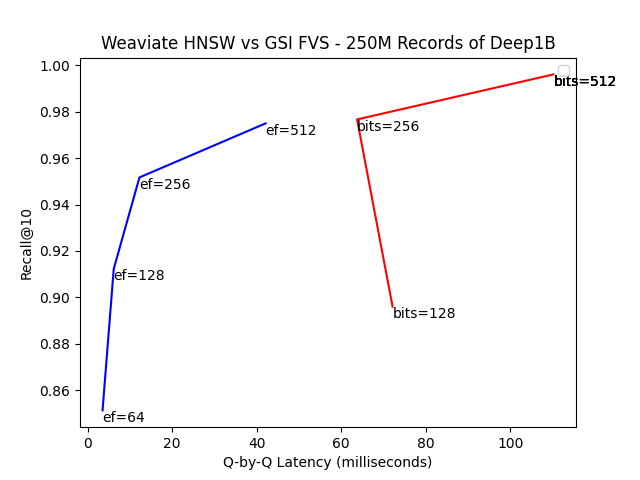

In [161]:
# 250M

# get dataframes for 250M
df_hnsw_250M = summary_df[ summary_df['numrecs']==250000000 ]
print(df_hnsw_250M )
df_gsi_250M  = summary_gsi_df[ summary_gsi_df['numrecs']==250000000 ]
print(df_gsi_250M )

# extract the lines for plotting
paretto_hnsw_parameters = list(df_hnsw_250M ['ef'])
paretto_hnsw_search = list(df_hnsw_250M ['search_mean'])
paretto_hnsw_recall = list(df_hnsw_250M ['recall10_mean'])
print(paretto_hnsw_search, paretto_hnsw_recall)
paretto_gsi_parameters = list(df_gsi_250M ['bits'])
paretto_gsi_search = list(df_gsi_250M ['search_mean'])
paretto_gsi_recall = list(df_gsi_250M ['recall10_mean'])
print(paretto_gsi_search, paretto_gsi_recall)

# plot
fig, ax = plt.subplots()
ax.plot(paretto_hnsw_search,paretto_hnsw_recall,color='blue')
ax.plot(paretto_gsi_search,paretto_gsi_recall,color='red')

# annotate gsi
for i, bits in enumerate(paretto_gsi_parameters):
    ax.annotate("bits=%d"%bits, 
            xy=(paretto_gsi_search[i],paretto_gsi_recall[i]-0.005 ), 
            xytext=(0.0,0.0),
            textcoords="offset points"
            )
    
# annotate hnsw
for i, bits in enumerate(paretto_hnsw_parameters):
    ax.annotate("ef=%d"%bits, 
            xy=(paretto_hnsw_search[i],paretto_hnsw_recall[i]-0.005 ), 
            xytext=(0.0,0.0),
            textcoords="offset points"
            )

ax.set_xlabel("Q-by-Q Latency (milliseconds)")
ax.set_ylabel("Recall@10")
plt.title("Weaviate HNSW vs GSI FVS - 250M Records of Deep1B")
ax.legend()

fig.savefig("results/paretto_250M.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


     ef    numrecs  recall10_mean  search_mean    import_time     wall_time
7    64  100000000         0.8710     2.715001  141989.792003  142015.02986
17  128  100000000         0.9276     4.726823  141989.792003  142015.02986
27  256  100000000         0.9640     9.006533  141989.792003  142015.02986
37  512  100000000         0.9816    15.211395  141989.792003  142015.02986
    bits    numrecs  recall10_mean  search_mean   import_time     wall_time
14   128  250000000         0.8960    72.141179  13419.462200  13419.462247
23   256  250000000         0.9767    63.741886  12914.538628  12914.538675
32   512  250000000         0.9961   110.187049           NaN           NaN
33   512  250000000         0.9961   110.187049           NaN           NaN
33   512  250000000         0.9961   110.187049           NaN           NaN
33   512  250000000         0.9961   110.187049           NaN           NaN
[2.715001, 4.7268229999999996, 9.006533000000001, 15.211395000000001] [0.870999999999997

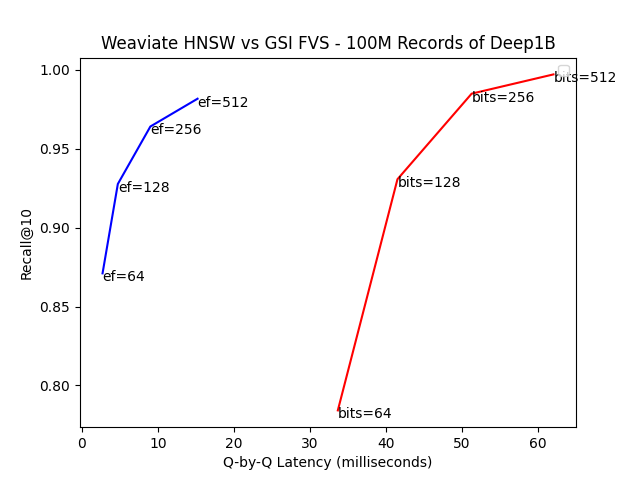

In [162]:
# 100M

# get dataframes for 100M
df_hnsw_100M = summary_df[ summary_df['numrecs']==100000000 ]
print(df_hnsw_100M )
df_gsi_100M  = summary_gsi_df[ summary_gsi_df['numrecs']==100000000 ]
print(df_gsi_250M )

# extract the lines for plotting
paretto_hnsw_parameters = list(df_hnsw_100M ['ef'])
paretto_hnsw_search = list(df_hnsw_100M ['search_mean'])
paretto_hnsw_recall = list(df_hnsw_100M ['recall10_mean'])
print(paretto_hnsw_search, paretto_hnsw_recall)
paretto_gsi_parameters = list(df_gsi_100M ['bits'])
paretto_gsi_search = list(df_gsi_100M ['search_mean'])
paretto_gsi_recall = list(df_gsi_100M ['recall10_mean'])
print(paretto_gsi_search, paretto_gsi_recall)

# plot
fig, ax = plt.subplots()
ax.plot(paretto_hnsw_search,paretto_hnsw_recall,color='blue')
ax.plot(paretto_gsi_search,paretto_gsi_recall,color='red')

# annotate gsi
for i, bits in enumerate(paretto_gsi_parameters):
    ax.annotate("bits=%d"%bits, 
            xy=(paretto_gsi_search[i],paretto_gsi_recall[i]-0.005 ), 
            xytext=(0.0,0.0),
            textcoords="offset points"
            )
    
# annotate hnsw
for i, bits in enumerate(paretto_hnsw_parameters):
    ax.annotate("ef=%d"%bits, 
            xy=(paretto_hnsw_search[i],paretto_hnsw_recall[i]-0.005 ), 
            xytext=(0.0,0.0),
            textcoords="offset points"
            )

ax.set_xlabel("Q-by-Q Latency (milliseconds)")
ax.set_ylabel("Recall@10")
plt.title("Weaviate HNSW vs GSI FVS - 100M Records of Deep1B")
ax.legend()

fig.savefig("results/paretto_100M.png")